In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Define Hx
def define_Hx(u,v,nu,dx,nx):
    #intialize u and v matrices
    un = u.copy()
    vn = v.copy()
    #intialize Hx matrices
    Hx_n = np.zeros([nx,nx])
    Hx_n_1 = np.zeros([nx,nx])
    #form convection matrices in y
    conv_x = np.zeros_like(un)
    conv_x_1 = np.zeros_like(un)
    conv_x[1:-1,1:-1] = (1/dx)*(un[1:-1,1:-1]*(un[2:,1:-1]-un[1:-1,1:-1])+vn[1:-1,1:-1]*(un[1:-1,2:]-un[1:-1,1:-1]))
    conv_x_1[1:-1,1:-1] = conv_x[:-2,1:-1]
    #form diffusion matrices in y
    diff_n = np.zeros_like(un)
    diff_n_1 = np.zeros_like(un)
    diff_n[1:-1,1:-1] = (nu/dx**2)*(un[2:,1:-1] - 2*un[1:-1,1:-1] + un[:-2,1:-1] + un[1:-1,2:] - 2*un[1:-1,1:-1] + un[1:-1,:-2] )
    diff_n_1[1:-1,1:-1] = diff_n[:-2,1:-1]
    #form final Hx(i,j) and Hx(i-1,j) 
    Hx_n = conv_x + diff_n
    Hx_n_1 = conv_x_1 + diff_n_1

    return Hx_n,Hx_n_1       

In [3]:
#Define Hy
def define_Hy(u,v,nu,dx,nx):
    #intialize u and v matrices
    un = u.copy()
    vn = v.copy()
    #intialize Hy matrices
    Hy_n = np.zeros([nx,nx])
    Hy_n_1 = np.zeros([nx,nx])
    #form convection matrices in y
    conv_y = np.zeros_like(un)
    conv_y_1 = np.zeros_like(un)
    conv_y[1:-1,1:-1] = (1/dx)*(un[1:-1,1:-1]*(vn[2:,1:-1]-vn[1:-1,1:-1])+vn[1:-1,1:-1]*(vn[1:-1,2:]-vn[1:-1,1:-1]))
    conv_y_1[1:-1,1:-1] = conv_y[1:-1,:-2]
    #form diffusion matrices in y
    diff_n = np.zeros_like(un)
    diff_n_1 = np.zeros_like(un)
    diff_n[1:-1,1:-1] = (nu/dx**2)*(vn[2:,1:-1] - 2*vn[1:-1,1:-1] + vn[:-2,1:-1] + vn[1:-1,2:] - 2*vn[1:-1,1:-1] + vn[1:-1,:-2] )
    diff_n_1[1:-1,1:-1] = diff_n[:-2,1:-1]
    #form final Hy(i,j) and Hy(i,j-1) 
    Hy_n = conv_y + diff_n
    Hy_n_1 = conv_y_1 + diff_n_1
    
    return Hy_n, Hy_n_1            


In [4]:
#Define Pressure
def define_P(p,Hx,Hy,dx,nx,dt):    
    B = np.zeros_like(p)
    B = dx * (Hx[0] - Hx[1] + Hy[0] - Hy[1]) / (8)
    M = (nx)**2
    #create coefficient matrix of zeroes to start
    A = np.zeros([M,M])
    #counter
    k = 0
    while k<M-1:
        #set boundary conditions with set values
        if k == 0:
            A[k,k] = 0
        #Northern border    
        elif (k>=1) and (k<=nx):
            A[k,k] = 0
        #Southern border    
        elif k > nx*(nx-1):
            A[k,k] = 0
        #western border
        elif k%nx == 0:
            A[k,k] = 0
        #eastern boundary condition    
        elif (k+1)%(nx) == 0:
            A[k,k] = A[k,k-1]
        #interior nodes
        else:
            A[k,k+1] = (-1/4)
            A[k,k+nx] = (-1/4)
            A[k,k-nx] = (-1/4)
            A[k,k-1] = (-1/4)
            A[k,k] = (1)
        k+=1
    
    #flatten original matrix for 'k' references
    known_grid_n = B.copy().flatten()
    #create inverse of A for solving linear algebra equations
    A =(np.linalg.pinv(A))
    #solve for unknown matrix B
    solution_grid = np.matmul(A,known_grid_n)
    #reshape final temperatures into mxm grid
    P_n = solution_grid.copy().reshape([nx,nx])
    #reset boundary nodes except insulated boundary
    P_n[-1,:] = P_n[-2,:]
    P_n[:,0] = P_n[:,1]
    P_n[:,-1] = P_n[:,-2]
    P_n[0,:] = P_n[1,:]
    
    return P_n

In [5]:
#solve u at n+1
def define_u_n1(u_n,dt,Hx,P_n,dx,nx):
    u_n1 = u_n.copy()
    u_n1[1:-1,1:-1] = u_n[1:-1,1:-1] + dt*(Hx[0][1:-1,1:-1] - (1/dx)*(P_n[1:-1,1:-1]-P_n[:-2,1:-1]))
    return u_n1

In [6]:
#solve v at n+1
def define_v_n1(v_n,dt,Hy,P_n,dx,nx):
    v_n1 = v_n.copy()
    v_n1[1:-1,1:-1] = v_n[1:-1,1:-1]  + dt*(Hy[0][1:-1,1:-1] - (1/dx)*(P_n[1:-1,1:-1]-P_n[1:-1,:-2]))
    v_n1[0,:] = 1
    return v_n1

Grid size 11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274

KeyboardInterrupt: 

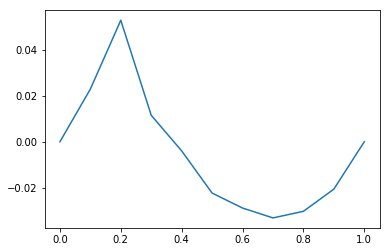

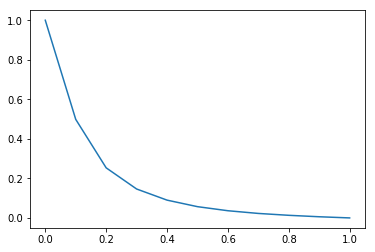

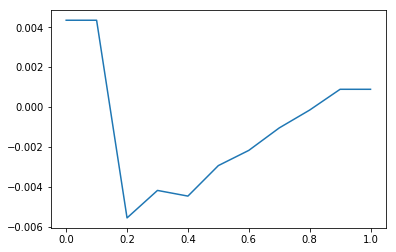

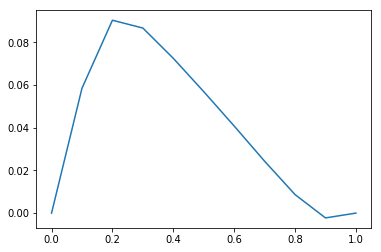

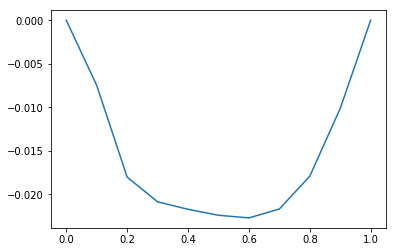

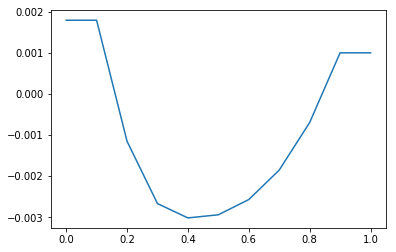

In [7]:
###main##
plt.close('all')
#intialize plots
fig1, ax1 = plt.subplots()    
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()    
fig4, ax4 = plt.subplots()
fig5, ax5 = plt.subplots()    
fig6, ax6 = plt.subplots()
grids =  [11,21,41]
leg = []#list for plot legends
#loop through succesive grid sizes for plotting on one graph
for nx in grids:
    print('Grid size '+str(nx))
    #run time is set very high to allow reaching steady state
    run_time = 20
    #determine dx based on number of nodes
    dx = dy =  1 / (nx - 1)
    #initialize variables
    nu = .01
    u_lid = 1
    Re = 100
    L = 1
    rho = nu*Re/(u_lid*L) #solve for density to show it is =1
    time_step = np.sqrt(dx**2/Re)
    nt = run_time/time_step
    steady_state_criteria = 1e-4
    
    #intial conditions
    v_0 = np.zeros((nx, nx))
    u_0 = np.zeros((nx, nx))
    p = np.zeros((nx, nx)) #for shape
    #working through algorithm with initial u and v to determine intial p at time n=0    
    Hx = define_Hx(u_0,v_0,nu,dx,nx)
    Hy = define_Hy(u_0,v_0,nu,dx,nx)
    P = define_P(p,Hx,Hy,dx,nx,time_step)
    #using p solution at time n=0, find u and v at time n = 1
    U_n = define_u_n1(u_0,time_step,Hx,p,dx,nx)
    V_n = define_v_n1(v_0,time_step,Hy,p,dx,nx)
    N = 1
    #loop to iterate through time until steady state condition is reached
    while N<=nt:
        #print(N)#to show program is running uncomment to show
        Hx = define_Hx(U_n,V_n,nu,dx,nx)
        Hy = define_Hy(U_n,V_n,nu,dx,nx)
        P = define_P(P,Hx,Hy,dx,nx,time_step)
        U_n_1 = define_u_n1(U_n,time_step,Hx,P,dx,nx)
        V_n_1 = define_v_n1(V_n,time_step,Hy,P,dx,nx)
        #check if steady state is reached, if not iterate again
        if (np.abs(np.max(U_n_1-U_n))<=steady_state_criteria)&(np.abs(np.max(V_n_1-V_n))<=steady_state_criteria):
            U_n = U_n_1
            V_n = V_n_1
            print('Steady state at '+str(N*time_step))
            break
        else:
            U_n = U_n_1
            V_n = V_n_1
            N+=1
    
    #make plots after iterations completed
    leg.append(nx)
    ax1.plot(np.linspace(0,1,num=len(U_n)),U_n[:,int((nx-1)/2)])    
    ax2.plot(np.linspace(0,1,num=len(U_n)),V_n[:,int((nx-1)/2)])    
    ax3.plot(np.linspace(0,1,num=len(U_n)),P[:,int((nx-1)/2)])    
    ax4.plot(np.linspace(0,1,num=len(U_n)),V_n[int((nx-1)/2),:])    
    ax5.plot(np.linspace(0,1,num=len(U_n)),U_n[int((nx-1)/2),:])    
    ax6.plot(np.linspace(0,1,num=len(U_n)),P[int((nx-1)/2),:])    
#formatting plots
ax1.set_xlabel('X at mid-Y axis')
ax1.set_ylabel('V')  
ax1.legend(leg) 

ax2.set_xlabel('X at mid-Y axis')
ax2.set_ylabel('U')
ax2.legend(leg) 

ax3.set_xlabel('X at mid-Y axis')
ax3.set_ylabel('P')  
ax3.legend(leg) 

ax4.set_xlabel('Y at mid-X axis')
ax4.set_ylabel('U')
ax4.legend(leg) 

ax5.set_xlabel('Y at mid-X axis')
ax5.set_ylabel('V')  
ax5.legend(leg) 

ax6.set_xlabel('Y at mid-X axis')
ax6.set_ylabel('P')
ax6.legend(leg) 